<h3>Сгенерируем выборку точек, равномерно распределенных внутри круга
двумя способами:</h3>

<h4>Равномерно распределим точки внутри квадрата, внутрь которого вписана
окружность.</h4>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [19]:
r=10 
set_size=1000

set_x = []
set_y = []
dots_counter = 0
while dots_counter < set_size:
    x = np.random.uniform(-10,10)
    y = np.random.uniform(-10,10)
    
    if x**2+y**2 <= r**2:
        set_x.append(x)
        set_y.append(y)
        dots_counter +=1

In [20]:
# формула построения окружности через угол+sin+cos
circle_angels=np.linspace(0, 2*np.pi,100)
circle_x= r*np.cos(circle_angels)
circle_y=r*np.sin(circle_angels)

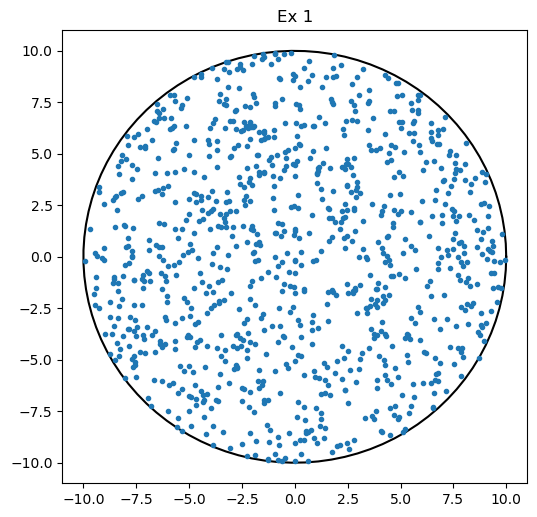

In [21]:
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 1')
plt.plot(circle_x, circle_y,'black')
plt.plot(set_x, set_y,'.')
plt.show()

<h4>Сгенерируем точки путем задания случайного угла и расстояния от центра
окружности.</h4>

In [27]:
r=10 
set_size=1000

rand_x = []
rand_y = []
dots_counter = 0
while dots_counter < set_size:
    R=r*np.sqrt(np.random.uniform(0,1)) #генерируем новый радиус
    angle = np.random.uniform(0,np.pi*2) #генерируем новый угол
    rx = np.cos(angle)*R
    ry = np.sin(angle)*R
    
    if rx**2+ry**2 <= r**2:
        rand_x.append(rx)
        rand_y.append(ry)
        dots_counter +=1

In [28]:
# формула построения окружности через угол+sin+cos
circle_angels=np.linspace(0, 2*np.pi,100)
circle_x= r*np.cos(circle_angels)
circle_y=r*np.sin(circle_angels)

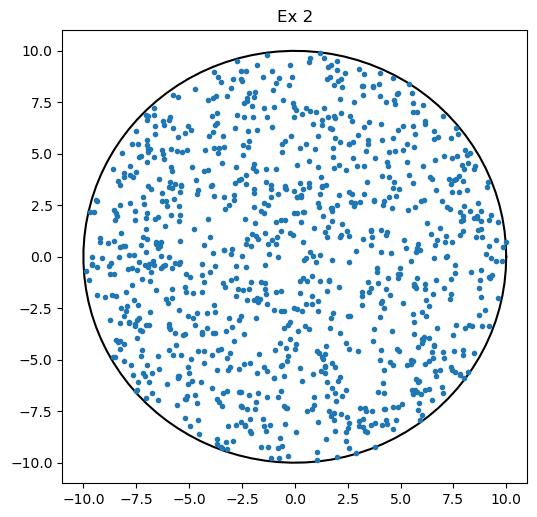

In [29]:
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 2')
plt.plot(circle_x, circle_y,'black')
plt.plot(rand_x, rand_y,'.')
plt.show()

<h4>Найдем выборочные средние координат точек и их дисперсию.</h4>

In [12]:
print("Ex 1")

mean_x = np.mean(set_x)
mean_y = np.mean(set_y)

var_x = np.var(set_x)
var_y = np.var(set_y)

print("математическое ожидание = ", mean_x, mean_y)
print("дисперсия = ", var_x, var_y)

Ex 1
математическое ожидание =  -0.16716617741574577 -0.1934454770708995
дисперсия =  24.92482295296573 24.855990248823982


In [13]:
print("Ex 2")
mean_x = np.mean(rand_x)
mean_y = np.mean(rand_y)

var_x = np.var(rand_x)
var_y = np.var(rand_y)

print("математическое ожидание = ", mean_x, mean_y)
print("дисперсия = ", var_x, var_y)

Ex 2
математическое ожидание =  -0.06524436083844862 0.12146208372745126
дисперсия =  17.46672631422746 16.696630979900203


<h4>Построим график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности.</h4>

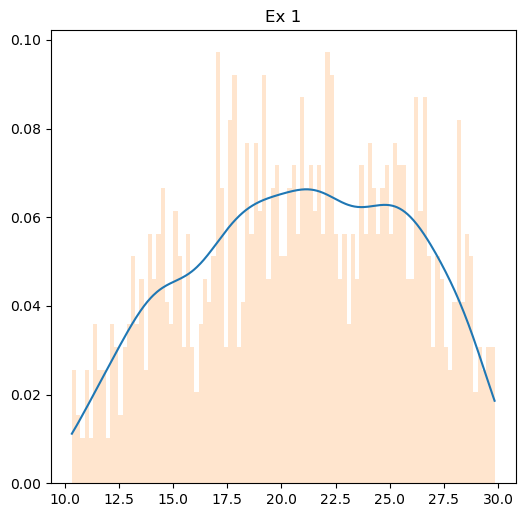

In [14]:
main_x = 20
main_y = 0

def distance (x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

distances = []
for i in range(set_size):
    distances.append(distance(set_x[i], set_y[i], main_x, main_y))
distances.sort()
    
kde_distances_y=gaussian_kde(distances).evaluate(distances)
    
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 1')
plt.plot(distances, kde_distances_y)
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()

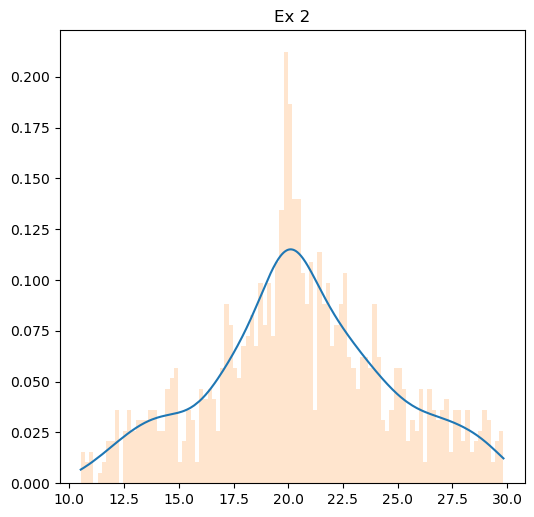

In [15]:
main_x = 20
main_y = 0

def distance (x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

distances = []
for i in range(set_size):
    distances.append(distance(rand_x[i], rand_y[i], main_x, main_y))
distances.sort()
    
kde_distances_y=gaussian_kde(distances).evaluate(distances)
    
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 2')
plt.plot( distances, kde_distances_y)
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()

<h4>Построим график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.</h4>

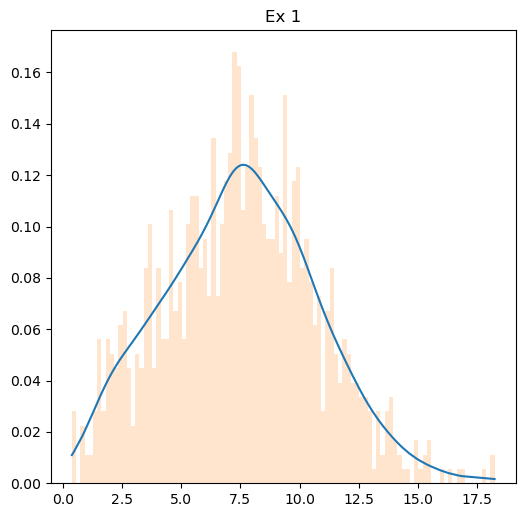

In [16]:
set_x_copy=np.copy(set_x)
set_y_copy=np.copy(set_y)
set_x_copy.sort()
set_y_copy.sort()
set_xr=[]
set_yr=[]
o=0
while o<set_size:
    set_xr=np.random.uniform(set_x_copy)
    set_yr=np.random.uniform(set_y_copy)
    o+=1

def distance (x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

distances = []
for i in range(set_size):
    distances.append(distance(set_x[i], set_y[i],  set_xr[i], set_yr[i]))
distances.sort()
    
kde_distances_y=gaussian_kde(distances).evaluate(distances)
    
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 1')
plt.plot( distances, kde_distances_y)
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()

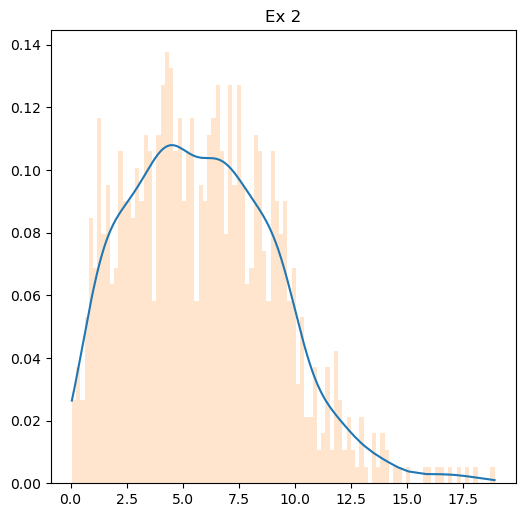

In [18]:
rand_x_copy=np.copy(rand_x)
rand_y_copy=np.copy(rand_y)
rand_x_copy.sort()
rand_y_copy.sort()
rand_xr=[]
rand_yr=[]
o=0
while o<set_size:
    rand_xr=np.random.uniform(rand_x_copy)
    rand_yr=np.random.uniform(rand_y_copy)
    o+=1
    
def distance (x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

distances = []
for i in range(set_size):
    distances.append(distance(rand_x[i], rand_y[i], rand_xr[i], rand_xr[i]))
distances.sort()
    
kde_distances_y=gaussian_kde(distances).evaluate(distances)
    
plt.figure(dpi=100, figsize=(6,6))
plt.title('Ex 2')
plt.plot( distances, kde_distances_y)
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()